In [1]:
# Step 1: Importing required libraries
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import dtreeviz
import warnings
warnings.filterwarnings(action='ignore')

>Here in the above cell we are importing all the necessary packages that we require in our program.

In [2]:
# Step 2: Importing required dataset
iris_dataset=pd.read_csv('datasets/iris.csv')

### `.read_csv()`
> `read_csv()` is a function defined in the pandas library that facilitates us to read csv files.

Here we are using this function to read our datatset which is contained in `iris.csv` file

In [3]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


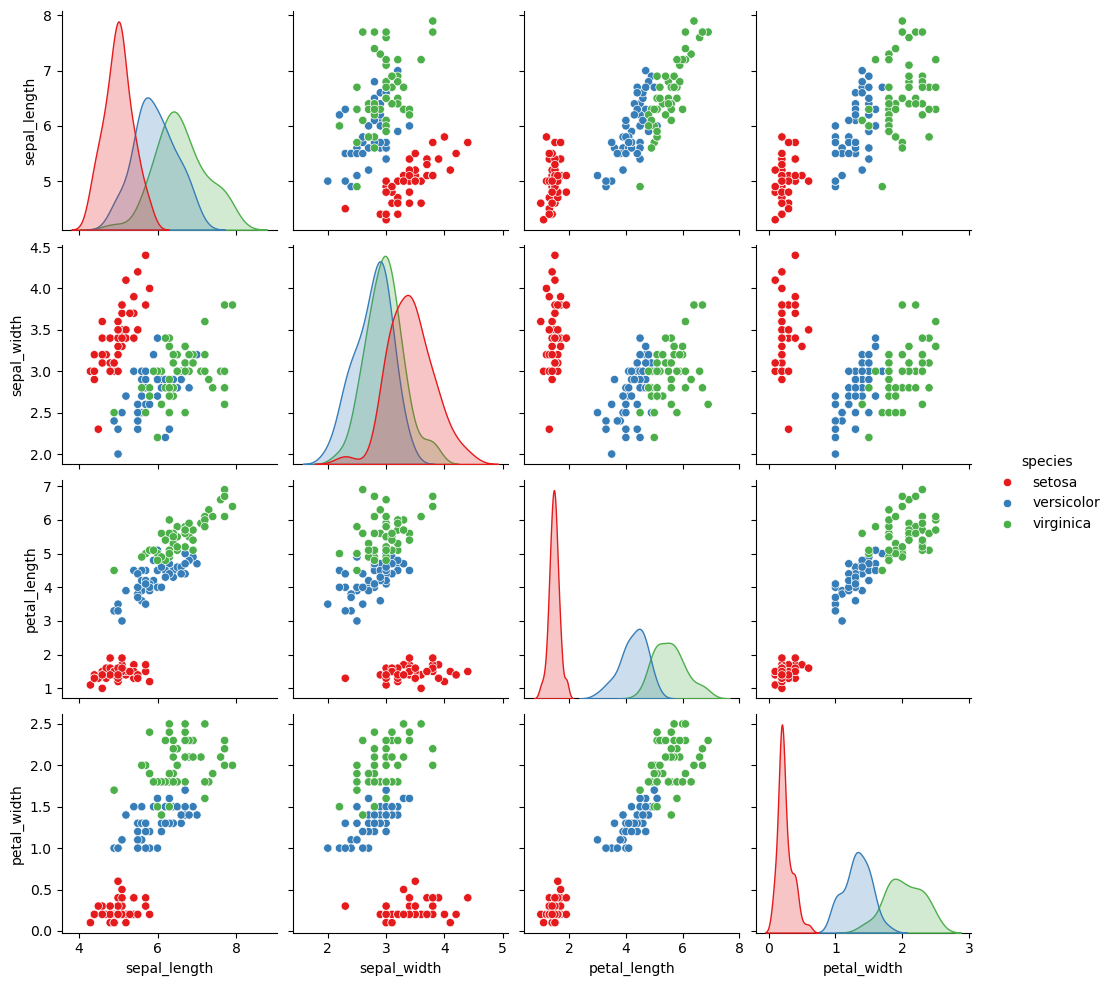

In [4]:
# Step 3: Visualizing Dataset (Ploting pairplot of the dataset)
sns.pairplot(iris_dataset,hue='species',palette='Set1')

In [5]:
# Step 4: Applying label encoder to encode Categorical Data
label_converter = LabelEncoder()
iris_dataset['species'] = label_converter.fit_transform(iris_dataset['species'])# Encoding Categorical Data

In [6]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### `.head()`
> `head()` function is defined in the pandas library.<p>
The syntax for `.head` is `.head(n)`

This function takes integer value as input. By default the value of `n=5`<p>
This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [7]:
#Step 5: Sperating imported datasets into features and labels set
data_points = iris_dataset.iloc[:, 0:4]
labels = iris_dataset.iloc[:, 4]

#### `.iloc[ ]`  function
It is defined in pandas library.
This .iloc function helps us to index the dataframe or dataset using index postions.
The syntax of .iloc functiond id `.iloc(rows,columns)`
Here we are have sepcified `.iloc[:,1:5]` this means that... we are selecting all the rows present in out dataset(iris.csv here) and out of all the colums that are present in out dataset we are only selecting 1st column upto 4th. As we can see here we are specifying columns [1:5]... so why the column with index is not taken because python doesnot include the last specified index. 

In [8]:
data_points

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [10]:
# Step 6: Spliting imported data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(data_points,labels,test_size=0.2)

### train_test_split() function 
> `train_test_split()` function is defined in Scikit-Learn library.<p>
> `train_test_split()` function helps in Spliting arrays or matrices into random train and test subsets.

The following is the syntax for `tarin_test_split`<p>
> **`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None`**

The following is the decription of arguments that are taken by `train_test_split()` function:
- **arrays** = An input array/series : x,y
<p>
- **test_size** = The value should be between 0 to 1.0 which can be used to represent the proportion of data we want to include in testing data. For example- As we can see here we have mentioned test_size = 0.2, this means that we are considering 20% of our data under test_size.
</p>
<p>
- **train_size** = By default it is None as it adjusts according to test_size. Value is between 0 and 1.0. we have to only define this parameter if we are not defining test_size parameter.As we can see here that we have not defied trin_size, so here it will be automatically adjusted and it will be 80% of our data as here we have considered 20% of our data for train_size.
</p>
<p>
- **random_state** = Here we pass an integer, which will act as the seed for the random number generator during the split. Or, we can also pass an instance of the RandomState class, which will become the number generator. If we don’t pass anything, the RandomState instance used by np.random will be used instead. Also, if we pass any random number here then the `train_test_split()` function will generate exactly the same outputs every single time we run this function, given that we assigned the same number to Random_state. If you want your results to be stochastic(different) each time, simply leave it as the default value “None”.
</p>
<p>
- **shuffle** = By default it is True , this is used to specify if we want to shuffle the data before splitting. If shuffle is False , then stratify must be None.
</p>
<p>
- **stratify** = By default it is None , stratify means array like.
</p>


In [11]:
# Step 7: Applying Standard Scaler
Standard_obj = StandardScaler()
Standard_obj.fit(x_train)
x_train_std = Standard_obj.transform(x_train)
x_test_std = Standard_obj.transform(x_test)

### StandardScaler() function
> `StadardScaler()` function is defined in *scikit-learn* library<p>
> This function Standardize features by removing the mean and scaling to unit variance.</p>

> Syntax for `StadardScaler()` is given by : <p>
>**`StandardScaler(*, copy=True, with_mean=True, with_std=True)`**

<p> Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed. StandardScaler is one of the scikit-learn method to preprocess data for machine learning.</p>

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 
StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because *variance = standard deviation squared*. And 1 squared = 1.</p>

<p> StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.
Deep learning algorithms often call for zero mean and unit variance. Regression-type algorithms also benefit from normally distributed data with small sample sizes.</p>

>**The standard score of a sample x is calculated as:**

> $$ z = {x - μ \over σ} $$

>Where $ μ $ is the mean of the training samples or zero if `with_mean=False`, and $s$ is the standard deviation of the training samples or one if `with_std=False`.

**`.fit()`** is one of the method provided by StandardScaler function.<p>
This method Computes the mean and std to be used for later scaling.
Syntax of `fit()` method is given by:</p>
>**`.fit(X, y=None, sample_weight=None)`**

The following is the decription of parameters that are taken by `.fit()` method:
- **x** = An input or data used to compute the mean and standard deviation used for later scaling along the features axis.
<p>
- **y** = Ignored
</p>
<p>
- **sample_weight** = Here we can secify the individual weights for each sample. By default its value is None
</p>

**`.transform()`** is another method which is provided by StandardScaler function.<p>
This method Perform standardization by centering and scaling by using thevalues computed by `.fit()` function.
Syntax of `transform()` method is given by:</p>
>**`.transform(X, copy=None)`**

The following is the decription of parameters that are taken by `.fit()` method:
- **x** = An input or data used to scale along the features axis.
<p>
- **copy** = Copy the input X or not.
</p>

Here as we can see that  we are also importing **`cross_val_score()`**<p>
`cross_val_score()` function is defined in scikit-learn that returns score for each test fold i.e. list of accuracy scores in each iteration.

> **Cross-Validation** is basically a resampling technique to make our model sure about its efficiency and accuracy on the unseen data. In short, Model Validation technique, up for other applications.

In [12]:
# Step 8: Initializing Random Forest Classifier Model
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)

In [13]:
# Step 9: Training the initialized random forest classifier model
random_forest.fit(x_train_std, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In the above cell we are using **Random Forest Classifier** to classify our given data.

Here, firstly we are training our Random Forest Classifier on the training data and then we are testing the performance of trained model using test dataset.Here we are using the Random Forest Classifier implementation that is provided by *Scikit-Learn* library via **`RandomForestClassifier()`** function.

>**Random Forest** is a classifier that evolves from Decision trees. As the name suggests, this algorithm creates the forest with a number of trees. The random forest algorithm is a supervised classification algorithm which can be used for both classification and regression kind of problems.

>Random forests create various number of decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

>To put it simple-Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

Random Forest Works in following four steps:
1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

| 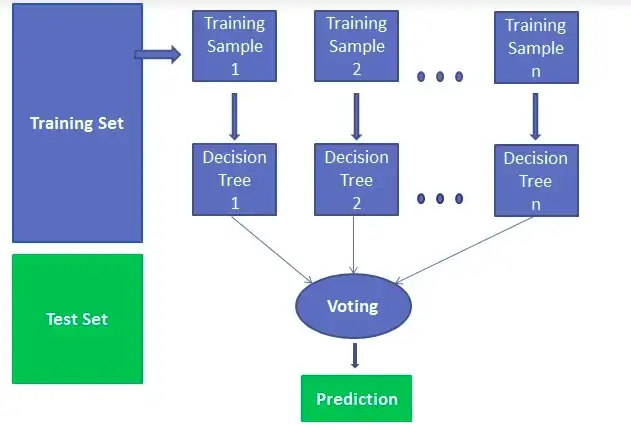 | 
|:--:| 
| *Random Forest Classifier* |

> Syntax for `RandomForestClassifier()` is given by : <p>
>**`RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)`**



In [14]:
# Step 10: Perform cross-validation
cv_scores = cross_val_score(random_forest, data_points , labels, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Cross-Validation Score: 0.9666666666666668


In [15]:
# Step 11: Evaluating Trained Random forest classifier
print('Training data accuracy {:.2f}'.format(random_forest.score(x_train_std, y_train)*100))
print('Testing data accuracy {:.2f}'.format(random_forest.score(x_test_std, y_test)*100))

Training data accuracy 100.00
Testing data accuracy 93.33


In [16]:
# Step 11: (Cont.) Evaluating Trained Random Forest Classifer
y_pred = random_forest.predict(x_test_std)
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.85      1.00      0.92        11
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



Confusion Matrix:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  2  8]]


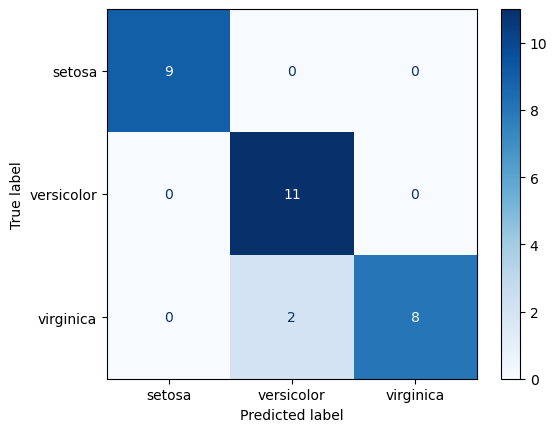

In [17]:
# Step 11: (Cont.) Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_converter.classes_).plot(cmap='Blues')
print("Confusion Matrix:")
print(conf_matrix)

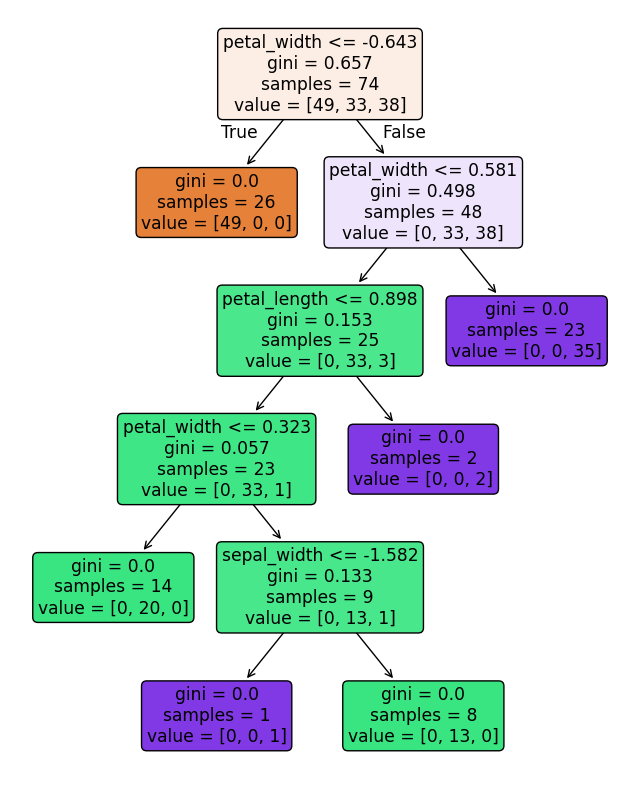

In [18]:
# Step 12: Visualizing Trained Random Forest Model (Just first tree)
features = list(iris_dataset.columns[0:4])
fig, ax = plt.subplots(figsize=(8, 10))
tree.plot_tree(random_forest.estimators_[0], feature_names=features, filled=True, rounded=True, ax=ax)
plt.show()

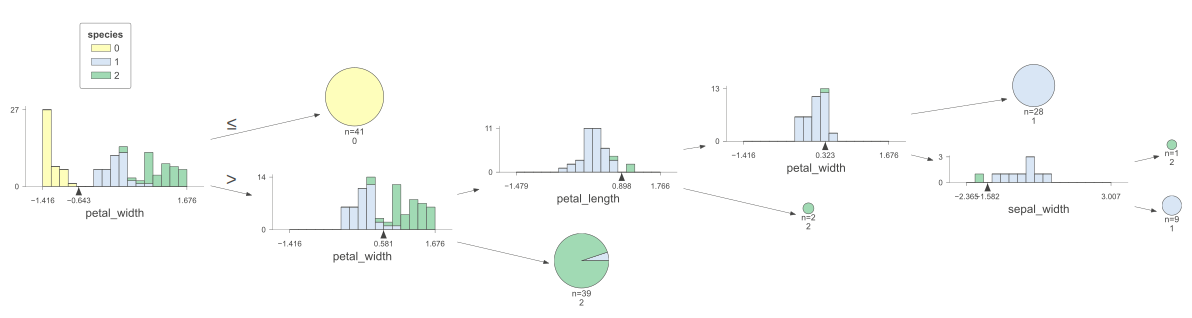

In [19]:
# Step 12: (Cont.) Visualizing Trained Random Forest Model (Just first tree)
# Here Using dtreeviz model
viz = dtreeviz.model(
    random_forest.estimators_[0],  # Accessing the first tree specified by .estimators_[0] 
    x_train_std,
    y_train,
    feature_names=list(data_points.columns),  # Use feature names from X
    target_name="species",           # Adjust according to your target variable name
    class_names=list(labels.unique()),    # Unique class names from target variable
      )

# View the visualization with left-to-right orientation
viz.view(scale=1.3, orientation="LR")